# Profile likelihoods for Planck, Planck+DESI for different neutrino mass hierarchies

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.interpolate import interp1d
from getdist import loadMCSamples
from getdist import plots

## $Planck$

In [2]:
# 
Mnus_Planck_deg = np.array([   0.  ,    0.03,    0.06,    0.09,    0.12,    0.15,    0.18,    0.21,    0.24,    0.27,    0.3 ])
chi2_Planck_deg = np.array([2772.88, 2773.18, 2773.64, 2774.2 , 2774.84, 2775.52, 2776.28, 2777.02, 2777.8 , 2778.6 , 2779.42])
# 
Mnus_Planck_1m  =  np.array([   0.  ,    0.03,    0.06,    0.09,    0.12,    0.15,    0.2 ,    0.25,    0.3 ,    0.35,    0.4 ,    0.45,    0.5 ,    0.55,    0.6 ,    0.7 ,    0.8 ,    0.9 ,    1.  ])
chi2_Planck_1m  =  np.array([2773.2 , 2773.58, 2774.08, 2774.56, 2775.04, 2775.52, 2776.28, 2777.1 , 2777.96, 2778.88, 2779.76, 2780.62, 2781.54, 2782.48, 2783.42, 2785.5 , 2787.92, 2790.6 , 2793.48])
# 2024_11_12_PL_Planck_Mnu_NH
Mnus_Planck_NH  =  np.array([     0.06,    0.08,    0.10,    0.12,    0.14,    0.16,    0.18,    0.20,    0.22,    0.26,    0.28,    0.30])
chi2_Planck_NH  =  2*np.array([1386.65, 1386.78, 1386.98, 1387.19, 1387.42, 1387.64, 1387.87, 1388.12, 1388.37, 1388.88, 1389.13, 1389.40])
# 2024_11_12_PL_Planck_Mnu_IH
Mnus_Planck_IH  =  np.array([     0.10,    0.12,    0.14,    0.16,    0.18,    0.20,    0.22,    0.24,    0.26,    0.28,    0.30])
chi2_Planck_IH  =  2*np.array([1387.02, 1387.19, 1387.41, 1387.64, 1387.88, 1388.11, 1388.38, 1388.64, 1388.91, 1389.14, 1389.39])

## $Planck$+DESI

In [3]:
# 2024_11_12_PL_PlanckDESI_Mnu_deg
Mnus_DESI_deg =   np.array([   0.00,    0.02,    0.04,    0.06,    0.08,    0.10,    0.12,    0.14,    0.16,    0.18,    0.20])
chi2_DESI_deg = 2*np.array([1393.50, 1393.78, 1394.29, 1394.91, 1395.65, 1396.49, 1397.41, 1398.43, 1399.54, 1400.74, 1402.00])
# 2024_11_10_PL_PlanckDESI_Mnu_1mass
Mnus_DESI_1m  =   np.array([    0.00,     0.02,     0.04,     0.06,     0.08,     0.10,     0.12,     0.14,     0.16,     0.18,     0.20])
chi2_DESI_1m  = 2*np.array([1393.57, 1393.99, 1394.57, 1395.25, 1396.01, 1396.86, 1397.74, 1398.68, 1399.69, 1400.72, 1401.81])
# 2024_11_11_MIN_PlanckDESI_Mnu_NH
Mnus_DESI_NH  = np.array([     0.06,    0.08,    0.10,    0.12,    0.14,    0.16,    0.18,    0.20])
chi2_DESI_NH  = 2*np.array([1395.08, 1395.69, 1396.49, 1397.42, 1398.41, 1399.54, 1400.73, 1402.00])
# 2024_11_12_PL_PlanckDESI_Mnu_IH
Mnus_DESI_IH  =   np.array([   0.12,    0.14,    0.16,    0.18,    0.20])
chi2_DESI_IH  = 2*np.array([1397.43, 1398.42, 1399.54, 1400.73, 1402.00])

In [4]:
# Labels & colors
label_deg = r"$\mathrm{3\ degenerate\ masses}$"
color_deg = 'yellowgreen' #'lightcoral'
label_1m  = r"$\mathrm{1\, massive\,/\, 2\, massless}$"
color_1m  = 'grey' #'dodgerblue'
label_NH  = r"$\mathrm{Normal\ hierarchy}$"
color_NH  = 'orange' #'yellowgreen'
lim_NH    = 0.06
label_IH  = r"$\mathrm{Inverted\ hierarchy}$"
color_IH  = 'dodgerblue' #'grey'
lim_IH    = 0.1

# Fonts
plt.rc('font',**{'family':'Helvetica','size':12})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  12}

In [5]:
def parab(x, a,b,c):
    return a + b * (x-c)**2.

In [6]:
# Neyman construction in terms of LR test statistic in units of sigma (i.e. sigma=1)
mu_FC = np.array([    0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000, 0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500, 0.9000, 0.9500, 1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000, 1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500, 1.9000, 1.9500, 2.0000, 2.0500, 2.1000, 2.1500, 2.2000, 2.2500, 2.3000, 2.3500, 2.4000, 2.4500, 2.5000, 2.5500, 2.6000, 2.6500, 2.7000, 2.7500, 2.8000, 2.8500, 2.9000, 2.9500, 3.0000, 3.0500, 3.1000, 3.1500, 3.2000, 3.2500, 3.3000, 3.3500, 3.4000, 3.4500, 3.5000, 3.5500, 3.6000, 3.6500, 3.7000, 3.7500, 3.8000, 3.8500, 3.9000, 10.000])
tLR_68_FC = np.array([0.2444, 0.2444, 0.3438, 0.4367, 0.5181, 0.5897, 0.6530, 0.7091, 0.7586, 0.8023, 0.8407, 0.8741, 0.9029, 0.9274, 0.9480, 0.9647, 0.9780, 0.9879, 0.9948, 0.9988, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tLR_95_FC = np.array([2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8570, 2.8594, 2.8680, 2.8871, 2.9182, 2.9602, 3.0105, 3.0664, 3.1258, 3.1868, 3.2483, 3.3093, 3.3690, 3.4270, 3.4829, 3.5365, 3.5874, 3.6356, 3.6809, 3.7233, 3.7626, 3.7988, 3.8320, 3.8621, 3.8891, 3.9131, 3.9340, 3.9520, 3.9670, 3.9791, 3.9884, 3.9949, 3.9987, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000])

# Interpolate
tLR_95_mu = interpolate.make_interp_spline(mu_FC, tLR_95_FC)
tLR_68_mu = interpolate.make_interp_spline(mu_FC, tLR_68_FC)

# Neyman construction in terms of the parameter
x0s = np.array([      -3.00000000, -2.9000000, -2.8000000, -2.7000000, -2.6000000, -2.5000000, -2.4000000, -2.3000000, -2.2000000, -2.1000000, -2.0000000, -1.9000000, -1.8000000, -1.7000000, -1.6000000, -1.5000000, -1.4000000, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,        2.20000000e+00,  2.30000000e+00,  2.40000000e+00,  2.50000000e+00,        2.60000000e+00,  2.70000000e+00,  2.80000000e+00,  2.90000000e+00,        3.00000000e+00])
CL95_upper = np.array([0.44480255, 0.45865505, 0.47346399, 0.48936427, 0.50651173, 0.52508606, 0.5452902 , 0.56733527, 0.59147626, 0.61798482, 0.64715761, 0.67928624, 0.71467396, 0.7535998 , 0.79631322, 0.84302084, 0.89387108, 0.94894641, 1.00826074, 1.07176277, 1.13934387, 1.21084903, 1.28609211, 1.36487003, 1.44697621, 1.53221235, 1.62039817, 1.71137824, 1.80502732, 1.90125384, 2.00000244, 2.10000244, 2.20000244, 2.30000244, 2.40000244, 2.50000244, 2.60000244, 2.70000244, 2.80000244, 2.90000244, 3.00000244, 3.10000244, 3.20000244, 3.30000244, 3.40000244, 3.50000244, 3.60000244, 3.70000244, 3.80000244, 3.90000244, 4.00000244, 4.10000244, 4.20000244, 4.30000244, 4.40000244, 4.50000244, 4.60000244, 4.70000244, 4.80000244, 4.90000244, 5.00000244])

# Interpolate
f_upper95 = interp1d(x0s, CL95_upper, kind='cubic')

## $Planck$

In [7]:
Mnus_deg = Mnus_Planck_deg
chi2_deg = chi2_Planck_deg
Mnus_1m  = Mnus_Planck_1m
chi2_1m  = chi2_Planck_1m
Mnus_NH  = Mnus_Planck_NH
chi2_NH  = chi2_Planck_NH
Mnus_IH  = Mnus_Planck_IH
chi2_IH  = chi2_Planck_IH

### Constructing intervals

In [8]:
# Lower limit imposed from hierarchy: 0 (DM/1M), 0.06 (NH), 0.1 (IH)
lower_lim = 0

########### deg.
print("deg.")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_deg, chi2_deg, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_deg = np.arange(-200,100.,0.01)
fit_y_deg = a + b * (fit_x_deg-c)**2.
ordinate_deg = a + b*(lower_lim-c)**2
parab_min_deg = a
c_deg = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_deg = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_deg)
x0 = c/sigma_deg
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_deg - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_deg - tLR_95_mu(x/sigma_deg)
intersec = fsolve(intersection, x0=[-10, 10])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### 1 massive
print("1 massive")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_1m, chi2_1m, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_1m = np.arange(-200,100.,0.01)
fit_y_1m = a + b * (fit_x_1m-c)**2.
ordinate_1m =a + b*(lower_lim-c)**2
parab_min_1m = a
c_1m = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_1m = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_1m)
x0 = c/sigma_1m
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_1m - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_1m - tLR_95_mu(x/sigma_1m)
intersec = fsolve(intersection, x0=[-10, 10])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### NH
print("NH")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_NH, chi2_NH, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_NH = np.arange(-200,100.,0.01)
fit_y_NH = a + b * (fit_x_NH-c)**2.
ordinate_NH = a + b*(lower_lim-c)**2
parab_min_NH = a
c_NH = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_NH = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_NH)
x0 = c/sigma_NH
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_NH - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_NH - tLR_95_mu(x/sigma_NH)
intersec = fsolve(intersection, x0=[-10, 10])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### NH
print("IH")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_IH, chi2_IH, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_IH = np.arange(-200,100.,0.01)
fit_y_IH = a + b * (fit_x_IH-c)**2.
ordinate_IH = a + b*(lower_lim-c)**2
parab_min_IH = a
c_IH = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_IH = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_IH)
x0 = c/sigma_IH
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_IH - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_IH - tLR_95_mu(x/sigma_IH)
intersec = fsolve(intersection, x0=[-10, 10])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

deg.
minimum of parabola:  -0.2592245346900475
1 sigma:  0.19112305369959728
x0:  -1.3563226919631084
chi2 2770.9308771181054
Naive 2sigma:  0.2026298211618835
Mnu <  0.17533879193158497  (at 95.45 C.L.)
----------------
1 massive
minimum of parabola:  -0.9319725039236033
1 sigma:  0.3796548213850869
x0:  -2.4547890647707495
chi2 2767.3112334208004
Naive 2sigma:  0.2701605510402196
Mnu <  0.20274293986838418  (at 95.45 C.L.)
----------------
NH
minimum of parabola:  -0.4123770173989573
1 sigma:  0.22530037670645725
x0:  -1.8303432219123241
chi2 2768.8283326742676
Naive 2sigma:  0.19843870264950217
Mnu <  0.15851397262308045  (at 95.45 C.L.)
----------------
IH
minimum of parabola:  -0.5727547021378122
1 sigma:  0.2525710442858272
x0:  -2.267697406713188
chi2 2766.8873356620725
Naive 2sigma:  0.19093141039401806
Mnu <  0.1452026086902582  (at 95.45 C.L.)
----------------


### Default PL analysis

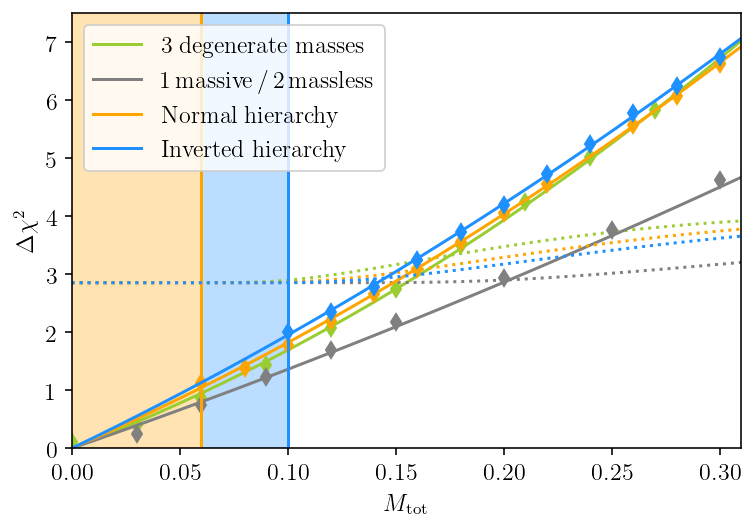

In [9]:
# deg
plt.plot(Mnus_deg, chi2_deg-ordinate_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg - ordinate_deg, color=color_deg, ls='-', label=label_deg)
plt.plot(fit_x_deg, tLR_95_mu(fit_x_deg/sigma_deg), color=color_deg, ls=":")

# 1m
plt.plot(Mnus_1m, chi2_1m-ordinate_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m - ordinate_1m, color=color_1m, ls='-', label=label_1m)
plt.plot(fit_x_1m, tLR_95_mu(fit_x_1m/sigma_1m), color=color_1m, ls=":")

# NH
plt.plot(Mnus_NH, chi2_NH-ordinate_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH - ordinate_NH, color=color_NH, ls='-', label=label_NH)
plt.plot(fit_x_NH, tLR_95_mu(fit_x_NH/sigma_NH), color=color_NH, ls=":")
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)

# IH
plt.plot(Mnus_IH, chi2_IH-ordinate_IH, marker="d", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH - ordinate_IH, color=color_IH, ls='-', label=label_IH)
plt.plot(fit_x_IH, tLR_95_mu(fit_x_IH/sigma_IH), color=color_IH, ls=":")
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)

# Aesthetics
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 7.5)
plt.xlim(0, 0.31)
plt.legend(loc= "upper left")
plt.savefig("PL_Planck.pdf", format="PDF")
plt.show()

### Extrapolated to unphysical regime

[]

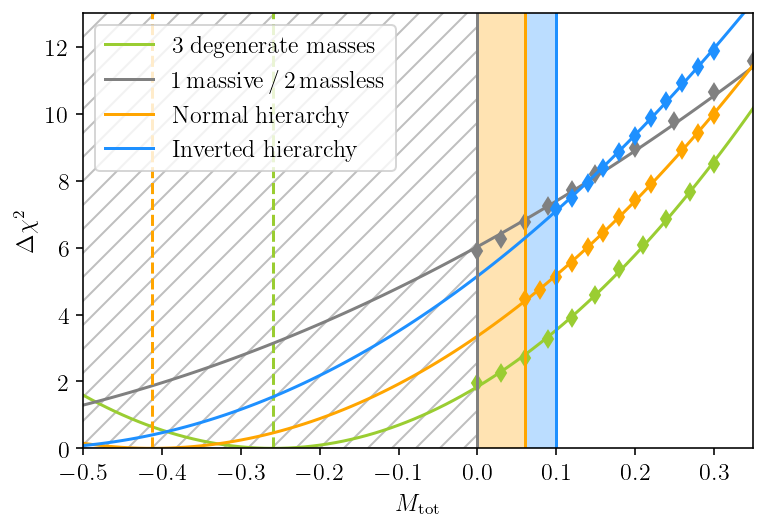

In [10]:
# deg
plt.plot(Mnus_deg, chi2_deg-parab_min_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg-parab_min_deg, color=color_deg, ls='-', label=label_deg)
plt.axvline(c_deg, color=color_deg, ls="--")

# 1m
plt.plot(Mnus_1m, chi2_1m-parab_min_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m-parab_min_1m, color=color_1m, ls='-', label=label_1m)
plt.axvline(c_1m, color=color_1m, ls="--")

# NH
plt.plot(Mnus_NH, chi2_NH-parab_min_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH-parab_min_NH, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)
plt.axvline(c_NH, color=color_NH, ls="--")

# IH
plt.plot(Mnus_IH, chi2_IH-parab_min_IH, marker="d", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH-parab_min_IH, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)
plt.axvline(c_IH, color=color_IH, ls="--")

# Aesthetics
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 13)
plt.xlim(-0.5, 0.35)
plt.axvline(0, color='grey', ls='-')
plt.legend()
plt.fill_between(x=[-1.,0], y1=[0], y2=[45], facecolor="white", hatch="//", edgecolor="grey", alpha=0.5)
plt.plot()

### Absolute $\chi^2$ values

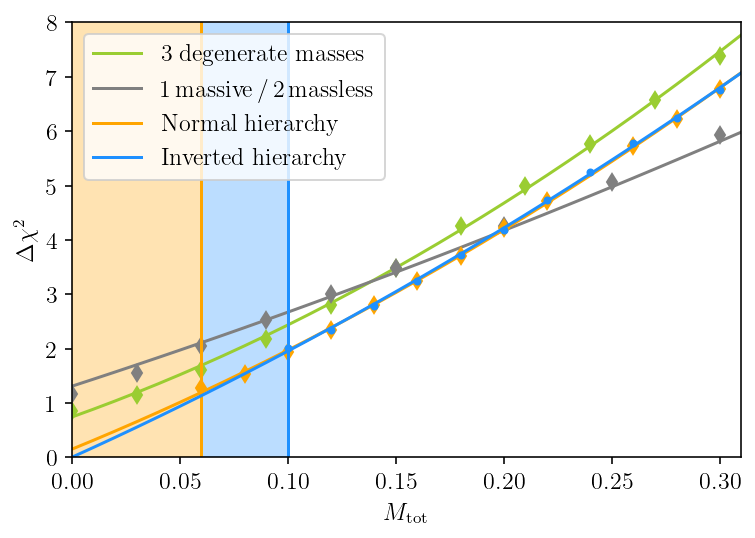

In [11]:
# Determine minimum ordinate
ordinate = np.minimum(np.minimum(ordinate_deg, ordinate_1m), np.minimum(ordinate_NH, ordinate_IH))

# deg
plt.plot(Mnus_deg, chi2_deg-ordinate, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg - ordinate, color=color_deg, ls='-', label=label_deg)

# 1m
plt.plot(Mnus_1m, chi2_1m-ordinate, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m - ordinate, color=color_1m, ls='-', label=label_1m)

# NH
plt.plot(Mnus_NH, chi2_NH-ordinate, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH - ordinate, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)

# IH
plt.plot(Mnus_IH, chi2_IH-ordinate, marker=".", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH - ordinate, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)


########### Make plot
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 8)
plt.xlim(0, 0.31)
plt.legend(loc= "upper left")
plt.show()

### Absolute $\chi^2$ values extrapolated 

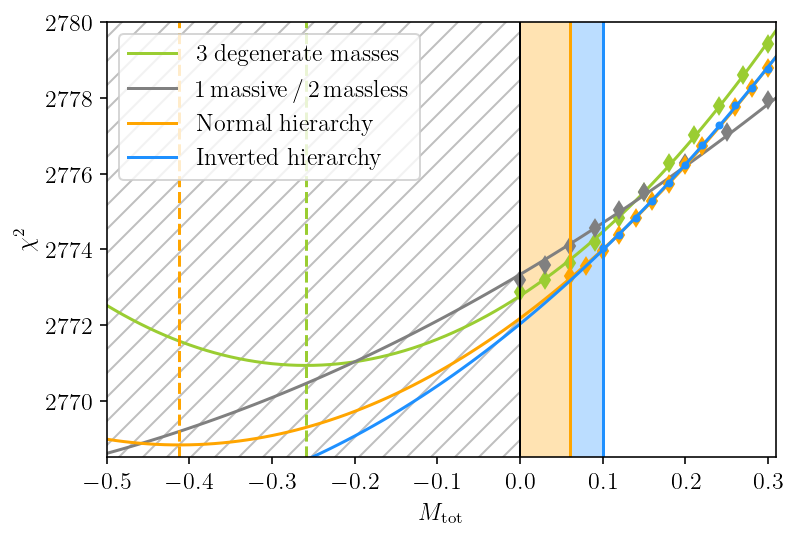

In [12]:
# deg
plt.plot(Mnus_deg, chi2_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg, color=color_deg, ls='-', label=label_deg)
plt.axvline(c_deg, color=color_deg, ls="--")

# 1m
plt.plot(Mnus_1m, chi2_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m, color=color_1m, ls='-', label=label_1m)
plt.axvline(c_1m, color=color_1m, ls="--")

# NH
plt.plot(Mnus_NH, chi2_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[2000], y2=[3000], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)
plt.axvline(c_NH, color=color_NH, ls="--")

# IH
plt.plot(Mnus_IH, chi2_IH, marker=".", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[2000], y2=[3000], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)
plt.axvline(c_IH, color=color_IH, ls="--")


########### Make plot
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\chi^2$", fontdict=font)
plt.ylim(2768.5, 2780)
plt.xlim(-0.5, 0.31)
plt.axvline(0, color="black", lw=1)
plt.axhline(0, color="black", lw=1)
plt.fill_between(x=[-1.,0], y1=[2000], y2=[3000], facecolor="white", hatch="//", edgecolor="grey", alpha=0.5)
plt.legend(loc= "upper left")
plt.savefig("PL_Planck_extrapolated.pdf", format="PDF")
plt.show()

## Planck+DESI

In [13]:
Mnus_deg = Mnus_DESI_deg
chi2_deg = chi2_DESI_deg
Mnus_1m  = Mnus_DESI_1m
chi2_1m  = chi2_DESI_1m
Mnus_NH  = Mnus_DESI_NH
chi2_NH  = chi2_DESI_NH
Mnus_IH  = Mnus_DESI_IH
chi2_IH  = chi2_DESI_IH

### Constructing intervals

In [14]:
# Lower limit imposed from hierarchy: 0 (DM/1M), 0.06 (NH), 0.1 (IH)
lower_lim = 0

########### deg.
print("deg.")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_deg, chi2_deg, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_deg = np.arange(-200,100.,0.01)
fit_y_deg = a + b * (fit_x_deg-c)**2.
ordinate_deg = a + b*(lower_lim-c)**2
parab_min_deg = a
c_deg = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_deg = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_deg)
x0 = c/sigma_deg
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_deg - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_deg - tLR_95_mu(x/sigma_deg)
intersec = fsolve(intersection, x0=[0, 1])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### 1 massive
print("1 massive")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_1m, chi2_1m, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_1m = np.arange(-200,100.,0.01)
fit_y_1m = a + b * (fit_x_1m-c)**2.
ordinate_1m = a + b*(lower_lim-c)**2
parab_min_1m = a
c_1m = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_1m = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_1m)
x0 = c/sigma_1m
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_1m - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_1m - tLR_95_mu(x/sigma_1m)
intersec = fsolve(intersection, x0=[0, 1])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### NH
print("NH")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_NH, chi2_NH, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_NH = np.arange(-200,100.,0.01)
fit_y_NH = a + b * (fit_x_NH-c)**2.
ordinate_NH = a + b*(lower_lim-c)**2
parab_min_NH = a
c_NH = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_NH = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_NH)
x0 = c/sigma_NH
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_NH - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_NH - tLR_95_mu(x/sigma_NH)
intersec = fsolve(intersection, x0=[0, 1])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

########### NH
print("IH")

#Fit parabola
[a,b,c], pcov = curve_fit(parab, Mnus_IH, chi2_IH, p0=[1388., 53., -0.13], maxfev=100000)
fit_x_IH = np.arange(-200,100.,0.01)
fit_y_IH = a + b * (fit_x_IH-c)**2.
ordinate_IH =a + b*(lower_lim-c)**2
parab_min_IH = a
c_IH = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_IH = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma_IH)
x0 = c/sigma_IH
print("x0: ", x0)
print("chi2", a)
def naive_intersection(x):
    return a + b * (x-c)**2. -ordinate_IH - 4.
print("Naive 2sigma: ", fsolve(naive_intersection, x0=[0, 1000])[1])

# Compute Neyman belt in LR-space
def intersection(x):
    return a + b * (x-c)**2. -ordinate_IH - tLR_95_mu(x/sigma_IH)
intersec = fsolve(intersection, x0=[0, 1])[1]
print("Mnu < ", intersec, " (at 95.45 C.L.)")
print("----------------")

deg.
minimum of parabola:  -0.07089414695673842
1 sigma:  0.06294550271292779
x0:  -1.1262781914708282
chi2 2785.5721955452223
Naive 2sigma:  0.07358604375505014
Mnu <  0.06638628663644469  (at 95.45 C.L.)
----------------
1 massive
minimum of parabola:  -0.1496167953324792
1 sigma:  0.07723055652842746
x0:  -1.9372745977482035
chi2 2783.226545218826
Naive 2sigma:  0.06542603969166577
Mnu <  0.05150859066920693  (at 95.45 C.L.)
----------------
NH
minimum of parabola:  -0.061716996643152264
1 sigma:  0.06200329375045591
x0:  -0.9953825500229729
chi2 2786.233007781491
Naive 2sigma:  0.07679878469152959
Mnu <  0.07084219046351545  (at 95.45 C.L.)
----------------
IH
minimum of parabola:  -0.0944444316484343
1 sigma:  0.06666666496157479
x0:  -1.416666510959713
chi2 2784.5010562793304
Naive 2sigma:  0.0689493490150213
Mnu <  0.05900753883457138  (at 95.45 C.L.)
----------------


### Default PL analysis

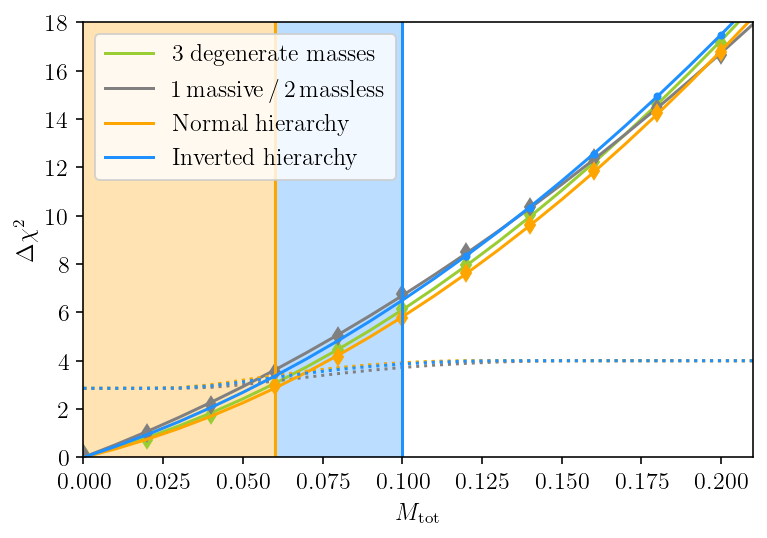

In [15]:
# deg
plt.plot(Mnus_deg, chi2_deg-ordinate_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg - ordinate_deg, color=color_deg, ls='-', label=label_deg)
plt.plot(fit_x_deg, tLR_95_mu(fit_x_deg/sigma_deg), color=color_deg, ls=":")

# 1m
plt.plot(Mnus_1m, chi2_1m-ordinate_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m - ordinate_1m, color=color_1m, ls='-', label=label_1m)
plt.plot(fit_x_1m, tLR_95_mu(fit_x_1m/sigma_1m), color=color_1m, ls=":")

# NH
plt.plot(Mnus_NH, chi2_NH-ordinate_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH - ordinate_NH, color=color_NH, ls='-', label=label_NH)
plt.plot(fit_x_NH, tLR_95_mu(fit_x_NH/sigma_NH), color=color_NH, ls=":")
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)

# IH
plt.plot(Mnus_IH, chi2_IH-ordinate_IH, marker=".", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH - ordinate_IH, color=color_IH, ls='-', label=label_IH)
plt.plot(fit_x_IH, tLR_95_mu(fit_x_IH/sigma_IH), color=color_IH, ls=":")
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)

# Aesthetics
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 18)
plt.xlim(0, 0.21)
plt.legend(loc= "upper left")
plt.savefig("PL_PlanckDESI.pdf", format="PDF")
plt.show()

### Extrapolated to unphysical regime

[]

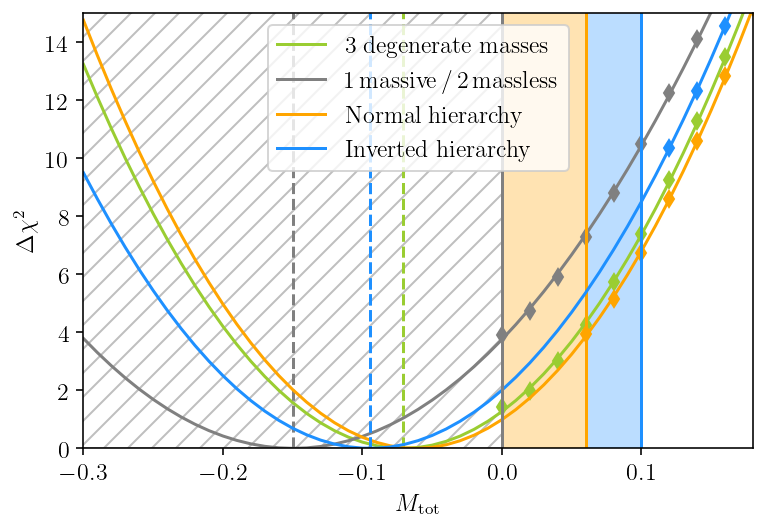

In [16]:
# deg
plt.plot(Mnus_deg, chi2_deg-parab_min_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg-parab_min_deg, color=color_deg, ls='-', label=label_deg)
plt.axvline(c_deg, color=color_deg, ls="--")

# 1m
plt.plot(Mnus_1m, chi2_1m-parab_min_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m-parab_min_1m, color=color_1m, ls='-', label=label_1m)
plt.axvline(c_1m, color=color_1m, ls="--")

# NH
plt.plot(Mnus_NH, chi2_NH-parab_min_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH-parab_min_NH, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(c_IH, color=color_IH, ls="--")
plt.axvline(lim_NH, color=color_NH)

# IH
plt.plot(Mnus_IH, chi2_IH-parab_min_IH, marker="d", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH-parab_min_IH, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(c_IH, color=color_IH, ls="--")
plt.axvline(lim_IH, color=color_IH)

# Aesthetics
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 15)
plt.xlim(-0.3, 0.18)
plt.axvline(0, color='grey', ls='-')
plt.legend()
plt.fill_between(x=[-1.,0], y1=[0], y2=[45], facecolor="white", hatch="//", edgecolor="grey", alpha=0.5)
plt.plot()

### Absolute $\chi^2$ values

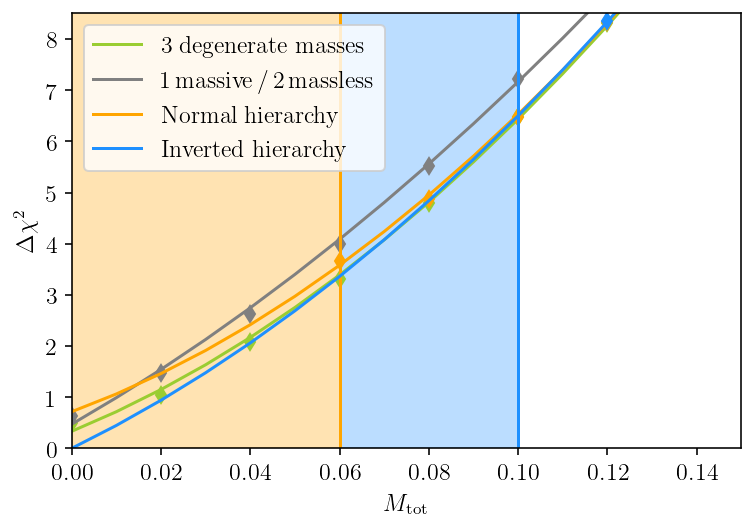

In [17]:
# Determine minimum ordinate
ordinate = np.minimum(np.minimum(ordinate_deg, ordinate_1m), np.minimum(ordinate_NH, ordinate_IH))

# deg
plt.plot(Mnus_deg, chi2_deg-ordinate, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg - ordinate, color=color_deg, ls='-', label=label_deg)

# 1m
plt.plot(Mnus_1m, chi2_1m-ordinate, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m - ordinate, color=color_1m, ls='-', label=label_1m)

# NH
plt.plot(Mnus_NH, chi2_NH-ordinate, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH - ordinate, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[0], y2=[45], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)

# IH
plt.plot(Mnus_IH, chi2_IH-ordinate, marker="d", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH - ordinate, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[0], y2=[45], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)


########### Make plot
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 8.5)
plt.xlim(0, 0.15)
plt.legend(loc= "upper left")
plt.show()

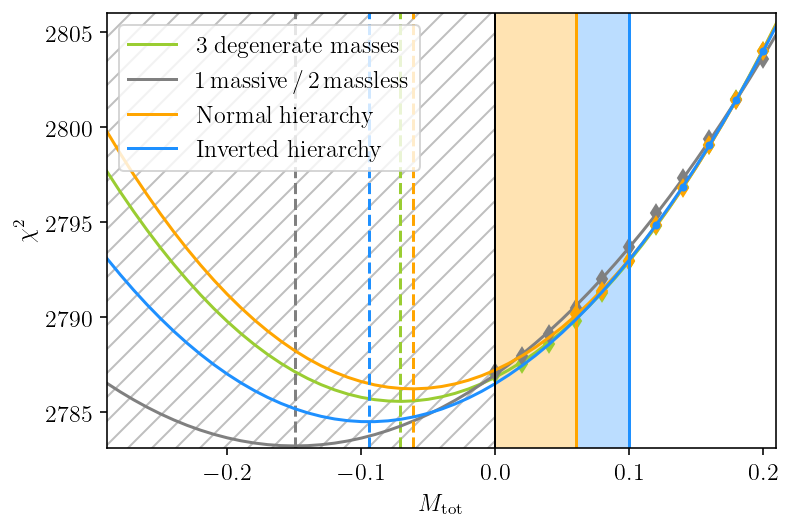

In [19]:
# deg
plt.plot(Mnus_deg, chi2_deg, marker="d", ls="", color=color_deg)
plt.plot(fit_x_deg, fit_y_deg, color=color_deg, ls='-', label=label_deg)
plt.axvline(c_deg, color=color_deg, ls="--")

# 1m
plt.plot(Mnus_1m, chi2_1m, marker="d", ls="", color=color_1m)
plt.plot(fit_x_1m, fit_y_1m, color=color_1m, ls='-', label=label_1m)
plt.axvline(c_1m, color=color_1m, ls="--")

# NH
plt.plot(Mnus_NH, chi2_NH, marker="d", ls="", color=color_NH)
plt.plot(fit_x_NH, fit_y_NH, color=color_NH, ls='-', label=label_NH)
plt.fill_between(x=[0,lim_NH], y1=[2000], y2=[3000], alpha=0.3, color=color_NH)
plt.axvline(lim_NH, color=color_NH)
plt.axvline(c_NH, color=color_NH, ls="--")

# IH
plt.plot(Mnus_IH, chi2_IH, marker=".", ls="", color=color_IH)
plt.plot(fit_x_IH, fit_y_IH, color=color_IH, ls='-', label=label_IH)
plt.fill_between(x=[lim_NH,lim_IH], y1=[2000], y2=[3000], alpha=0.3, color=color_IH)
plt.axvline(lim_IH, color=color_IH)
plt.axvline(c_IH, color=color_IH, ls="--")


########### Make plot
plt.xlabel(r"$M_\mathrm{tot}$", fontdict=font)
plt.ylabel(r"$\chi^2$", fontdict=font)
plt.ylim(2783.1, 2806)
plt.xlim(-0.29, 0.21)
plt.axvline(0, color="black", lw=1)
plt.axhline(0, color="black", lw=1)
plt.fill_between(x=[-1.,0], y1=[2000], y2=[3000], facecolor="white", hatch="//", edgecolor="grey", alpha=0.5)
plt.legend(loc= "upper left")
plt.savefig("PL_PlanckDESI_extrapolated.pdf", format="PDF")
plt.show()